## Curse of Dimensionality

The "Curse of Dimensionality" refers to the challenges and issues that arise when dealing with high-dimensional data. It describes the phenomenon where the increasing number of dimensions in a dataset leads to various problems that can affect data analysis and machine learning algorithms. Here are some key aspects of the curse of dimensionality:

Increased data sparsity: As the number of dimensions increases, the available data becomes sparser. In high-dimensional space, the volume of the space grows exponentially with each additional dimension. Consequently, the data points become increasingly sparse, making it difficult to obtain reliable statistical estimates and draw meaningful conclusions.

Increased computational complexity: Algorithms that work efficiently in low-dimensional spaces often face computational challenges in high-dimensional spaces. Many computational tasks, such as distance calculations, nearest neighbor searches, and optimization problems, become computationally expensive or intractable due to the exponential growth in the number of possible combinations.

Overfitting: High-dimensional spaces provide more freedom for the data to be fitted closely, which can lead to overfitting. Overfitting occurs when a model becomes too complex and captures noise or random fluctuations in the data rather than true patterns or relationships. This can result in poor generalization performance on new, unseen data.

Increased model complexity and parameter estimation: As the number of dimensions increases, the complexity of models and the number of parameters also tend to grow. This can lead to issues such as increased model complexity, difficulties in estimating model parameters accurately, and potential model instability.

Curse of dimensionality in sampling and feature selection: High-dimensional spaces pose challenges for sampling and feature selection techniques. Random sampling in high-dimensional spaces may require a significantly larger number of samples to ensure representativeness. Similarly, identifying relevant features or performing feature selection becomes more challenging as the number of dimensions increases, potentially leading to increased noise, redundancy, or irrelevant features in the dataset.

To mitigate the curse of dimensionality, various techniques are employed, such as dimensionality reduction methods (e.g., PCA, t-SNE), feature selection algorithms, regularization techniques, and domain-specific knowledge for reducing dimensionality or improving model performance in high-dimensional spaces. It is important to carefully consider the trade-offs between dimensionality reduction, feature selection, and maintaining the relevant information in the data when dealing with high-dimensional datasets.

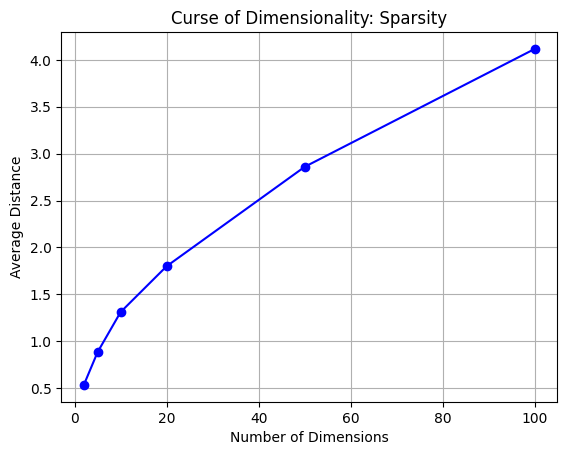

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of dimensions and the number of points
num_dimensions = [2, 5, 10, 20, 50, 100]
num_points = 100

# Generate random points in high-dimensional space
data = []
for dim in num_dimensions:
    X = np.random.rand(num_points, dim)
    data.append(X)

# Calculate the average distance between points for each dimensionality
avg_distances = []
for X in data:
    distances = []
    for i in range(num_points):
        for j in range(i + 1, num_points):
            distance = np.linalg.norm(X[i] - X[j])
            distances.append(distance)
    avg_distances.append(np.mean(distances))

# Plot the average distances as dimensionality increases
plt.plot(num_dimensions, avg_distances, 'bo-')
plt.xlabel('Number of Dimensions')
plt.ylabel('Average Distance')
plt.title('Curse of Dimensionality: Sparsity')
plt.grid(True)
plt.show()


## **Two different ways to remove curse of dimensionality**

- ### 1. Feature Selection
- ###  2. Dimensionality Reduction  

## Principle Components Analysis


Principal Components Analysis (PCA) is a dimensionality reduction technique commonly used in data analysis and machine learning. Its primary goal is to transform a high-dimensional dataset into a lower-dimensional space while preserving the most important information present in the original data. PCA achieves this by finding a set of orthogonal axes called principal components that capture the maximum variance in the data.

The mathematical intuition behind PCA can be understood through the following steps:

Data centering: The first step in PCA is to center the data by subtracting the mean of each feature from the corresponding data points. Centering the data ensures that the principal components represent the direction of maximum variance in the dataset.

Covariance matrix: After centering the data, we compute the covariance matrix. The covariance matrix measures the relationships between pairs of features and provides insights into the spread and orientation of the data. The covariance between two variables measures how they vary together.

Eigendecomposition: The next step is to perform an eigendecomposition on the covariance matrix. Eigendecomposition is a process that decomposes a matrix into its eigenvalues and eigenvectors. The eigenvectors represent the principal components, while the eigenvalues correspond to the amount of variance captured by each principal component. The eigenvectors are orthogonal to each other, meaning they form a set of perpendicular axes in the feature space.

Ordering eigenvalues: The eigenvalues are sorted in descending order. This ordering reflects the importance of each principal component in capturing the variance present in the data. The principal component with the highest eigenvalue captures the most variance, while the one with the lowest eigenvalue captures the least.

Projection: To reduce the dimensionality of the data, we select the top k principal components based on the desired number of dimensions. These principal components represent the new axes in the transformed space. The original data points are projected onto these principal components to obtain the reduced-dimensional representation. The projection is essentially a linear combination of the original features weighted by the corresponding eigenvectors.

The key intuition behind PCA is that the principal components are chosen such that they capture the maximum variance in the data. By selecting a subset of principal components, we can represent the data in a lower-dimensional space without losing significant information. This is particularly useful for visualizing high-dimensional data, identifying patterns, and reducing noise or redundancy in the dataset.

Overall, PCA provides a mathematical framework for identifying the most important features or dimensions in a dataset and represents them in a lower-dimensional space, facilitating analysis, visualization, and further processing of the data.

### Mathematical intuition of PCA

Certainly! Let's break down the mathematical intuition behind Principal Components Analysis (PCA) into a step-by-step process:

Data centering: Given a dataset with n data points and m features, we first center the data by subtracting the mean of each feature from the corresponding data points. This can be mathematically represented as:

X_centered = X - mean(X)

Where X is the original dataset, and mean(X) represents the mean value along each feature.

Covariance matrix: Next, we compute the covariance matrix, which measures the relationships between pairs of features in the centered dataset. The covariance matrix C is an m x m symmetric matrix, where each element represents the covariance between two features. The element C(i, j) is calculated as:

C(i, j) = (1 / (n - 1)) * sum((X_centered[:, i] - mean(X_centered[:, i])) * (X_centered[:, j] - mean(X_centered[:, j])))

Here, X_centered[:, i] denotes the i-th column of the centered dataset.

Eigendecomposition: We perform an eigendecomposition on the covariance matrix C to obtain its eigenvalues and eigenvectors. The eigenvectors represent the principal components, while the eigenvalues represent the amount of variance captured by each principal component. Let's denote the eigenvectors as V and eigenvalues as λ.

Ordering eigenvalues: The eigenvalues are typically sorted in descending order. This sorting reflects the importance of each principal component in capturing the variance present in the data. The principal component with the highest eigenvalue captures the most variance, while the one with the lowest eigenvalue captures the least.

Projection: To reduce the dimensionality of the data, we select the top k principal components based on the desired number of dimensions. Let's denote the selected principal components as V_selected (an m x k matrix), corresponding to the k highest eigenvalues. The original data points X are then projected onto these principal components to obtain the reduced-dimensional representation:

X_reduced = X_centered * V_selected

Here, X_reduced is the transformed dataset, where each data point is represented by its reduced set of features.

The key idea behind PCA is to find a set of orthogonal axes (principal components) that capture the maximum variance in the data. By selecting a subset of these components, we can effectively reduce the dimensionality of the data while preserving the most important information. This mathematical framework allows us to analyze, visualize, and process high-dimensional datasets more effectively.

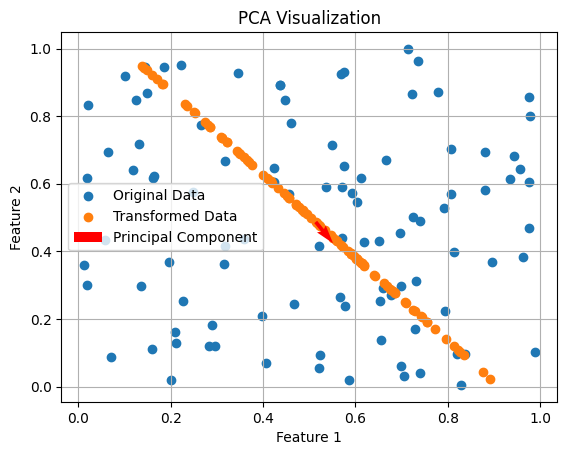

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random dataset
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 data points in 2-dimensional space

# Center the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Compute the covariance matrix
cov_matrix = np.cov(X_centered.T)

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Choose the desired number of principal components
num_components = 1
selected_eigenvectors = eigenvectors[:, :num_components]

# Project the data onto the selected principal components
X_transformed = np.dot(X_centered, selected_eigenvectors)

# Plot original data
plt.scatter(X[:, 0], X[:, 1], label='Original Data')

# Plot transformed data
X_reconstructed = X_mean + np.dot(X_transformed, selected_eigenvectors.T)
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], label='Transformed Data')

# Plot principal component vector
origin = X_mean
scale = 3
plt.quiver(*origin, scale * selected_eigenvectors[0, 0], scale * selected_eigenvectors[1, 0], color='r', label='Principal Component')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('PCA Visualization')
plt.grid(True)
plt.show()


### Why dimensionality Reduction used
- Prevent : Curse of Dimensionality
- Improve to performance of the model
- Vistuaized the data

## Feature Selection Vs Feature Extraction

Feature extraction and feature selection are two techniques used in machine learning for dimensionality reduction, but they serve different purposes:

Feature Extraction:
Feature extraction involves transforming the original features into a new set of features. It aims to capture the most relevant and informative aspects of the data while reducing its dimensionality. This is typically achieved through techniques like Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), or autoencoders. Feature extraction creates new features that are a combination or representation of the original features, often using mathematical transformations. These new features aim to retain the most important information from the original data, reducing redundancy and noise. Feature extraction is commonly used when the original feature space is large, and there is a need to reduce it to a more compact and meaningful representation.

Feature Selection:
Feature selection involves choosing a subset of the original features from the dataset. It aims to identify and select the most relevant and informative features that contribute the most to the prediction task. Feature selection methods evaluate the importance or relevance of each feature individually or in combination with others and select the subset that provides the best predictive performance. The selected features are used directly for training the model, and the remaining features are discarded. Feature selection can be based on statistical techniques, correlation analysis, information gain, or other criteria. The goal is to reduce the dimensionality of the feature space while maintaining or improving the model's performance and interpretability.

In summary, feature extraction creates new features by transforming the original features, while feature selection selects a subset of the original features. Feature extraction focuses on creating a new representation of the data, while feature selection aims to identify the most informative features for the prediction task. Both techniques contribute to dimensionality reduction and can help improve model performance, interpretability, and computational efficiency.

Feature selection is the process of identifying and selecting a subset of relevant features from a larger set of available features in a dataset. It aims to improve model performance, reduce overfitting, enhance interpretability, and reduce computational complexity by focusing on the most informative and discriminative features. There are various techniques for feature selection, including the following popular approaches:

Filter methods: These methods use statistical measures to rank features based on their relevance to the target variable, independently of any specific machine learning algorithm. Common filter methods include correlation-based feature selection, chi-square test, information gain, and mutual information. Features are selected based on their scores or ranking, and a threshold is often set to determine the desired number of features to keep.

Wrapper methods: These methods evaluate feature subsets by training and testing a machine learning model on different combinations of features. Wrapper methods search through the feature space using a search algorithm (e.g., forward selection, backward elimination, or recursive feature elimination) and select the subset that optimizes a specific performance metric, such as accuracy or cross-validation error. Wrapper methods are computationally more expensive than filter methods since they involve training models multiple times.

Embedded methods: These methods perform feature selection as an intrinsic part of the model training process. Feature importance is determined during model training, and irrelevant or redundant features are automatically assigned low weights or eliminated. Examples of embedded methods include regularization techniques like L1 regularization (Lasso) and tree-based methods such as Random Forest feature importance or Gradient Boosting feature importance.

Dimensionality reduction techniques: Although not strictly feature selection methods, dimensionality reduction techniques like Principal Component Analysis (PCA) and t-SNE can indirectly address feature selection. These techniques transform the original feature space into a lower-dimensional space by creating new features that capture the most significant variance in the data. The reduced dimensions can be used as features for subsequent modeling.

When applying feature selection, it's important to carefully consider the specific characteristics of the dataset, the goals of the analysis, and the chosen machine learning algorithm. It's also crucial to evaluate the impact of feature selection on model performance and generalization using appropriate evaluation metrics and cross-validation techniques.

By selecting relevant features and reducing the dimensionality of the dataset, feature selection can help improve model interpretability, reduce computational requirements, mitigate the curse of dimensionality, and enhance the overall effectiveness and efficiency of the machine learning pipeline.

## Feature Extraction


Feature extraction is the process of transforming raw or high-dimensional data into a lower-dimensional representation by creating new features that capture the most important and informative aspects of the data. Unlike feature selection, which involves selecting a subset of existing features, feature extraction constructs new features based on the original ones.

Here are a few common techniques for feature extraction:

Principal Component Analysis (PCA): PCA is a widely used dimensionality reduction technique that identifies the directions of maximum variance in the data and projects the data onto a lower-dimensional space. The new dimensions, called principal components, are orthogonal to each other and capture the most significant variation in the data. By selecting a subset of principal components, we can reduce the dimensionality while preserving the most important information.

Linear Discriminant Analysis (LDA): LDA is a technique used for feature extraction and dimensionality reduction in the context of classification. It aims to find a lower-dimensional space that maximizes the separation between different classes while minimizing the within-class scatter. LDA identifies the directions that maximize the between-class variance and minimizes the within-class variance, creating new features that are highly discriminative for classification tasks.

Autoencoders: Autoencoders are neural network models that can be used for unsupervised feature extraction. They consist of an encoder network that maps the input data to a lower-dimensional representation (latent space) and a decoder network that reconstructs the original data from the latent space. The encoder network learns to capture the most salient features of the input data in the latent space, effectively extracting meaningful representations.

Non-negative Matrix Factorization (NMF): NMF is a technique that decomposes a non-negative matrix into two non-negative matrices, where the product approximates the original matrix. NMF can be used for feature extraction by decomposing the data matrix into a set of basis vectors and their corresponding weights. The basis vectors represent new features that are a linear combination of the original features, allowing for a lower-dimensional representation of the data.

Feature hashing: Feature hashing, also known as the hashing trick, is a technique commonly used for text data and high-dimensional categorical features. It involves mapping the original features to a fixed-length feature space using a hash function. This reduces the dimensionality and memory requirements by eliminating the need to explicitly store the original features. However, it may lead to collisions where different features are hashed to the same value.

Feature extraction can be particularly useful when dealing with high-dimensional or complex data where the original features are noisy, redundant, or not well-suited for a specific task. By creating new features that capture the essential information, feature extraction can improve model performance, reduce overfitting, enhance interpretability, and facilitate more efficient and effective machine learning.

### The mathematical formula of Co-variance
$$Cov(x,y) = \frac{\sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)}{N-1}$$

### The mathematical formula of  Co-relation
$$Corr(x,y) = \frac{Cov(x) Cov(y)}{\sigma_x \sigma_y}$$

### In feature Extraction if featrure are important we create new features.

# Geometric Intition behind PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique that aims to find a new set of orthogonal axes, called principal components, that capture the maximum variance in the data. The geometric intuition behind PCA can be understood as finding the directions along which the data varies the most.

Here's a step-by-step explanation of the geometric intuition behind PCA:

Consider a dataset with multiple variables/features. Each data point in the dataset represents a vector in a high-dimensional space, where each dimension corresponds to a different feature.

PCA starts by standardizing the data, ensuring that each feature has zero mean and unit variance. This step is important to prevent features with larger scales from dominating the analysis.

PCA then finds the directions in the data space along which the variance is maximized. These directions are called principal components. The first principal component corresponds to the direction of maximum variance.

The first principal component is represented by a vector in the original feature space. It indicates the direction in which the data varies the most.

PCA proceeds to find the second principal component, which is orthogonal to the first principal component and captures the remaining variance that is not explained by the first component.

This process continues until all principal components are identified. The number of principal components is equal to the number of features in the original dataset.

Each principal component is a linear combination of the original features. The coefficients of the linear combination form the eigenvectors associated with the covariance matrix of the standardized data.

The eigenvalues associated with the eigenvectors represent the amount of variance explained by each principal component. The eigenvalue of a principal component reflects its importance in capturing the variability in the data.

The principal components are ranked in descending order based on their eigenvalues. The first few principal components capture the majority of the variance in the data, allowing for dimensionality reduction.

By projecting the original data onto a subset of the principal components, we obtain a lower-dimensional representation of the data. This reduced-dimensional representation retains most of the important information in the original dataset.

In summary, PCA finds the directions in the data space along which the variance is maximized, and these directions form the principal components. The principal components provide a lower-dimensional representation of the data that retains the most significant information. The geometric intuition behind PCA lies in identifying the directions of maximum variance and capturing the variability in the dataset.

 ## PCA will select best Principle components one.

## Implemtation of PCA with python

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import datasets

In [8]:
datasets = datasets.load_iris()

In [9]:
X = datasets['data']
y = datasets['target']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [11]:
###
pca=PCA(n_components=3)

In [12]:
X_train = pca.fit_transform(X_train)

In [13]:
pca.components_

array([[ 0.36873621, -0.06977632,  0.85630117,  0.35484246],
       [ 0.68187006,  0.69682861, -0.1867726 , -0.12082672],
       [-0.53692993,  0.63566209,  0.05426774,  0.55199182]])

In [14]:
pca.explained_variance_

array([4.09169476, 0.24435467, 0.0879732 ])